## Подготовка данных

### Импорт и предварительный анализ данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
def data_about(data):
    """Изучаем общую информацию о датафреймах"""
    display(data.head())
    display(data.info())
    display(data.describe())
    display('Пропуски в датасете:',data.isna().sum().sum())

In [4]:
data_about(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


'Пропуски в датасете:'

4100

In [5]:
data_about(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


'Пропуски в датасете:'

90

In [6]:
data_about(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


'Пропуски в датасете:'

4481

### Проверка корректности расчета эффективности обогащения, на основании MAE.

In [7]:
def recovery(data):
    """Расчет эффективности обогащения"""
    feed_au, concentrate_au, tail_au = (data["rougher.input.feed_au"],
                                        data["rougher.output.concentrate_au"],data["rougher.output.tail_au"])
    recovery_val= (((concentrate_au) * ((feed_au) - (tail_au)))/
                       (((feed_au) * ((concentrate_au) - (tail_au))))) * 100
    return recovery_val

df_test = data_train.dropna(subset = ['rougher.input.feed_au',
                                'rougher.output.concentrate_au',
                                'rougher.output.tail_au',
                                'rougher.output.recovery'],axis = 0).apply(recovery,axis = 1)

print("MAE между расчётам и значением признака:", MAE(data_train['rougher.output.recovery'], df_test))

MAE между расчётам и значением признака: 9.73512347450521e-15


###  Анализ признаков, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

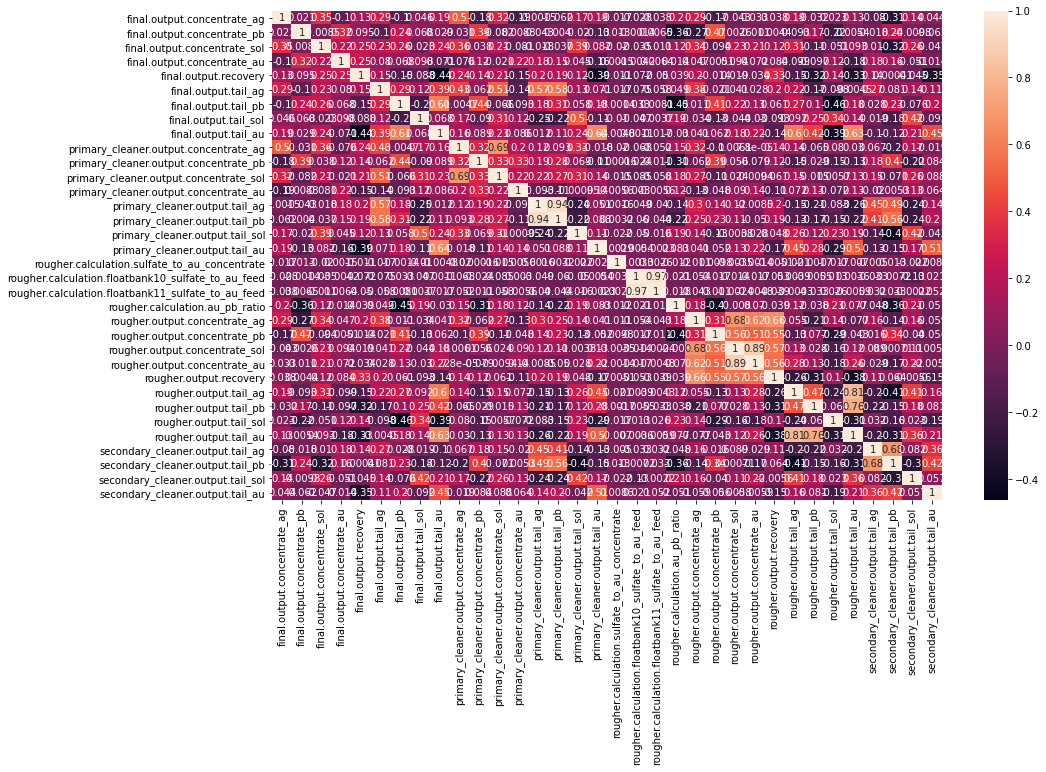

In [8]:
#Построение корреляционной матрицы
plt.figure(figsize = (15,9))
corr_matrix = sns.heatmap(data_train[[i for i in data_train.columns if i not in data_test.columns]].corr(),
                          annot=True)
plt.show()

### Предобработка данных

In [9]:
#Заполняем пропущенные значения на основе соответствующего значения в предыдущей столбце
data_train = data_train.ffill()
data_test = data_test.ffill().reset_index(drop=True)
data_full = data_full.ffill().reset_index(drop=True)

In [10]:
print('Суммарное количество пропусков:', data_full.isna().sum().sum())
print('Суммарное количество пропусков:', data_train.isna().sum().sum())
print('Суммарное количество пропусков:', data_test.isna().sum().sum())

Суммарное количество пропусков: 0
Суммарное количество пропусков: 0
Суммарное количество пропусков: 0


In [11]:
#Изменяем формат данных с object на datetime
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

**Выводы:**<br>
Данные представлены в трех датафреймах: полная, обучающая и тестовая. В данных есть пропуски в количестве 4481,4100 и 90 соответственно. Их заполнили значениями на основе соответствующих значений в предыдущего столбца. Изменены формат дат с object на datetime.<br>

Вычисления признака rougher.output.recovery в обучающей выборке можно считать верными, MAE = 9.735e-15.<br>

При построение корреляционной матрицы на обучающей выборке, обнаружили признаки не вошедшие в тестовою выборку с тип параметра: output - параметры продукта, calculation - расчётные характеристики. Эти параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.<br>
Также имеются признаки с сильной прямой корреляцией: 0.94
между "primary_cleaner.output.tail_pb" и "primary_cleaner.output.tail_ag", 0.97 между "rougher.calculation.floatbank10_sulfate_to_au_feed" и "rougher.calculation.floatbank11_sulfate_to_au_feed", 0.89 между "rougher.output.concentrate_au" и "rougher.output.concentrate_sol".<br>

## Анализ данных

### Проверка изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [12]:
data_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

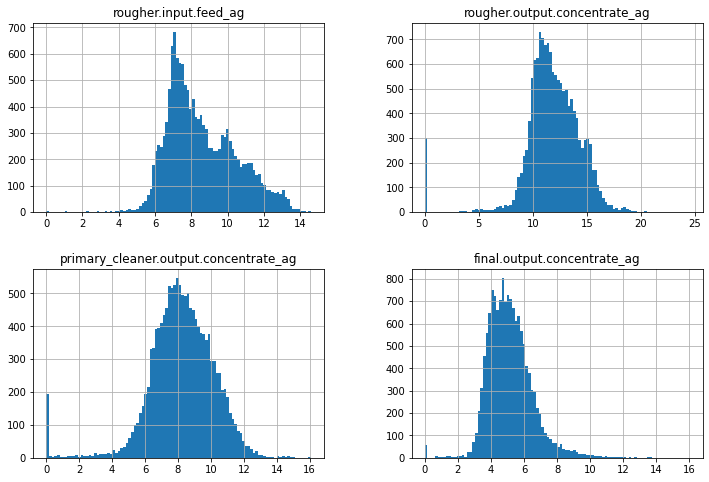

In [13]:
data_train[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
            'final.output.concentrate_ag']].hist(figsize=(12,8),bins=100)
plt.show() 

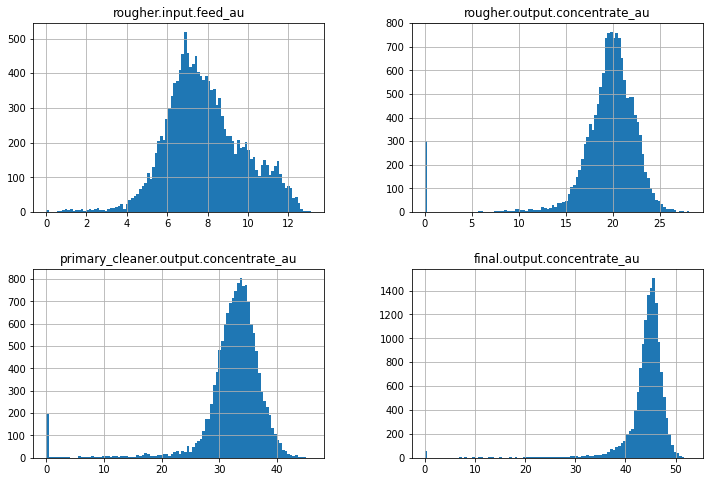

In [14]:
data_train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
            'final.output.concentrate_au']].hist(figsize=(12,8),bins=100)
plt.show() 
 

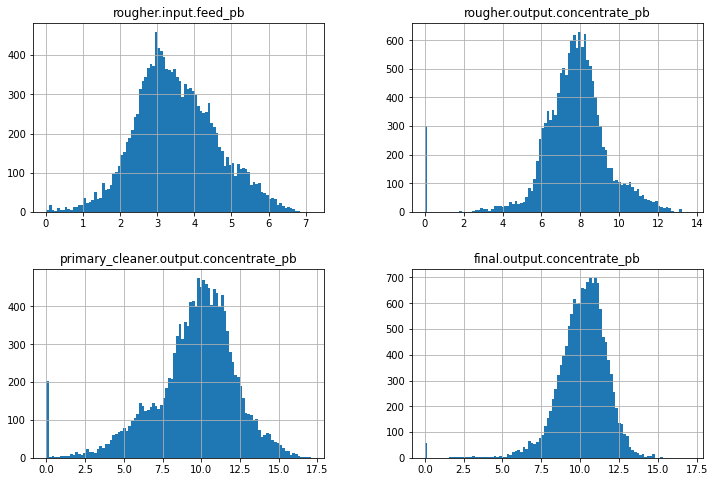

In [15]:
data_train[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
            'final.output.concentrate_pb']].hist(figsize=(12,8),bins=100)
plt.show() 

### Сравние распределения размеров гранул сырья на обучающей и тестовой выборках

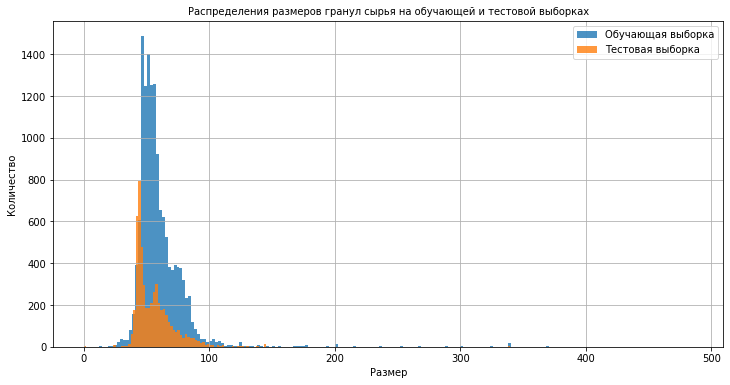

In [16]:
data_train['rougher.input.feed_size'].hist(bins=200, figsize=(12,6), alpha=0.8)
data_test['rougher.input.feed_size'].hist(bins=200, figsize=(12,6), alpha=0.8)
plt.xlabel('Размер', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=10)
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

### Исследование суммарной концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [17]:
def stages_of_cleaning(data, concentrat_ag,concentrat_au,concentrat_pb,concentrat_sol):
    """Расчет суммарной концентрацию всех веществ на разных стадиях"""
    data['sum_con'] = data[concentrat_ag] + data[concentrat_au] + data[concentrat_pb] + data[concentrat_sol]
    data = data.query('sum_con >= 0.1')
    print("Сумма концентрата:", data['sum_con'].sum())
    data['sum_con'] .plot.hist(bins=200, figsize=(12,6), alpha=0.8)
    plt.xlabel('Значение концентрации', fontsize=10)
    plt.ylabel('Количество', fontsize=10)
    plt.title('Концентрация металлов', fontsize=10)
    data = data.dropna(subset = ['sum_con'],axis = 0)
    return data

Сумма концентрата: 795770.2572216876


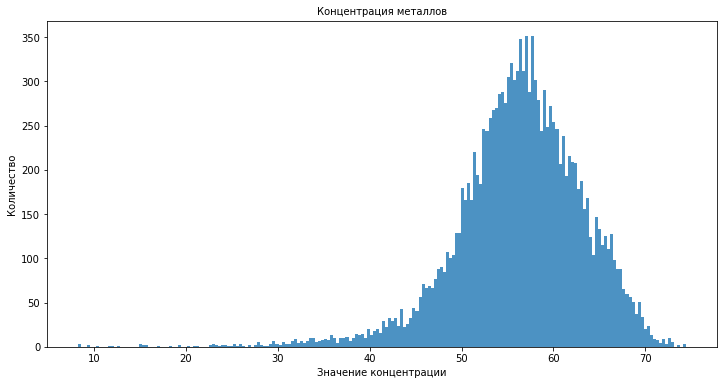

In [18]:
# Концентрация всех металлов на этапе сырья
data_train = stages_of_cleaning(data_train, 'rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_sol')

Сумма концентрата: 950432.6342222743


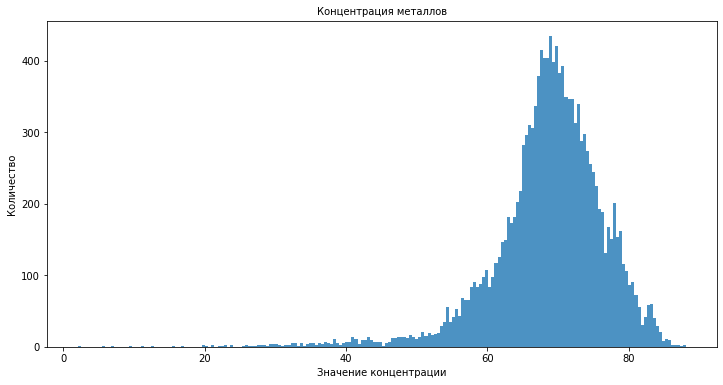

In [19]:
# Концентрация всех металлов на черновом этапе
data_train = stages_of_cleaning(data_train,'rougher.output.concentrate_ag','rougher.output.concentrate_au',
                   'rougher.output.concentrate_pb','rougher.output.concentrate_sol')

Сумма концентрата: 946898.8380847782


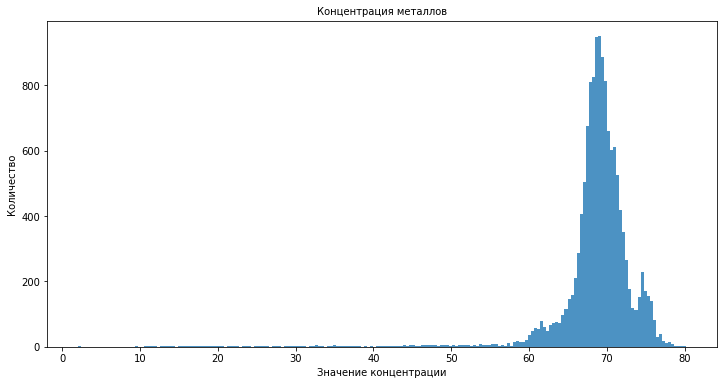

In [20]:
# Концентрация всех металлов на финальном этапе
data_train = stages_of_cleaning(data_train,'final.output.concentrate_ag','final.output.concentrate_au',
                   'final.output.concentrate_pb','final.output.concentrate_sol')

**Выводы:** <br>
Исследование изменения концентрация металлов (Au, Ag, Pb) в сырье, в черновом и финальном концентратах показало:
- на этапах флотации и первичной очистки появляются нулевые значения, а на финальном этапе они практически исчезают
- по графику видно, что золото растёт, а серебро падает. Свинец, как побочный элемент химических реакций, поэтому эго концентрация немного увеличивается;
- распределение сильно изменилось  у золота, его количество увеличилось в 3 раза, а частота изменилась с 4-12 да 40-50.<br>

Сравнение размеров гранул сырья на обучающей и тестовой выборках показало нормальное распределение и не отличаются друг от друга, следовательно оценка модели будет правильная.<br>

С каждым этапом количество металла увеличивалось с мах точки в сырье 350, до мах точки на финальном этапе 1000. Так же наглядно видно сокращение размаха значения концентрации.

## sMAPE и обучение моделей

In [21]:
def smape(target, pred):
    """Расчет Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»"""
    smape = 1/len(target) * np.sum(abs(target - pred) / ((abs(target) + abs(pred))/2)*100)
    return smape

In [22]:
def smape_final(rougher, final):
    """Расчет итоговой метрики"""
    return (0.25 * rougher) + (0.75 * final)

In [23]:
scoring =  make_scorer(smape, greater_is_better=True)

In [24]:
data_train = data_train.drop([i for i in data_train.columns if i not in data_test.columns], axis=1)

In [25]:
#Добавляем в выборки целевые признаки
date = list(data_train['date'])
temp = data_full.query('date == @date')[['date', 'rougher.output.recovery', 'final.output.recovery']]
data_train = data_train.merge(temp, on='date')
data_train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


In [26]:
date_t = list(data_test['date'])
temp_t = data_full.query('date == @date_t')[['date', 'rougher.output.recovery', 'final.output.recovery']]
data_test = data_test.merge(temp_t, on='date')
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [27]:
def data_selections(data):
    """Разделяем выборки на X и Y"""
    features = data.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
    target_rougher = data['rougher.output.recovery']
    target_final = data['final.output.recovery']
    return features, target_rougher, target_final

In [28]:
features_train, target_rougher_train, target_final_train = data_selections(data_train)
features_test, target_rougher_test, target_final_test = data_selections(data_test)

In [29]:
print(features_train.shape)
print(target_rougher_train.shape)
print(target_final_train.shape)
print(features_test.shape)
print(target_rougher_test.shape)
print(target_final_test.shape)

(13789, 52)
(13789,)
(13789,)
(5290, 52)
(5290,)
(5290,)


In [30]:
#Масштабирование признаков
pd.options.mode.chained_assignment = None
scaler_train = StandardScaler()
scaler_train.fit(features_train)
features_train = scaler_train.transform(features_train)
features_test = scaler_train.transform(features_test)

**Линейная регрессия**

In [31]:
model_LR = LinearRegression()
scores_LR_rougher = cross_val_score(model_LR, features_train, target_rougher_train, cv=5, scoring=scoring).mean()

scores_LR_final = cross_val_score(model_LR, features_train, target_final_train, cv=5, scoring=scoring).mean()

print("Итоговая sMAPE: {:.2f}".format (smape_final(scores_LR_rougher, scores_LR_final)))


Итоговая sMAPE: 10.01


**Дерево решений в регрессии**

In [32]:
model_DTR = DecisionTreeRegressor(random_state=12345)
scores_DTR_rougher = cross_val_score(model_DTR, features_train, target_rougher_train, cv=5, scoring=scoring).mean()


scores_DTR_final = cross_val_score(model_DTR, features_train, target_final_train, cv=5, scoring=scoring).mean()

print("Итоговая sMAPE: {:.2f}".format (smape_final(scores_DTR_rougher, scores_DTR_final)))

Итоговая sMAPE: 14.58


**Случайный лес в регрессии**

In [33]:
#Случайный лес без подбора гиперпараметров
model_RFR= RandomForestRegressor()
scores_RFR_rougher = cross_val_score(model_RFR, features_train, target_rougher_train, cv=3, scoring=scoring).mean()


scores_RFR_final = cross_val_score(model_RFR, features_train, target_final_train, cv=3, scoring=scoring).mean()

print("Итоговая sMAPE: {:.2f}".format (smape_final(scores_RFR_rougher, scores_RFR_final)))

Итоговая sMAPE: 10.09


In [34]:
#Случайный лес с подбором гиперпараметров через циклы
best_model_RFR = None
best_result_RFR = 1000
for est in range(3, 15, 3):
    for depth in range(1, 5):
        model_RFR = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores_RFR_rougher = cross_val_score(model_RFR, features_train,
                                             target_rougher_train, cv=3, scoring=scoring).mean()
        scores_RFR_final = cross_val_score(model_RFR, features_train,
                                           target_final_train, cv=3, scoring=scoring).mean()
        smape_RFR = smape_final(scores_RFR_rougher, scores_RFR_final)
        if smape_RFR < best_result_RFR:
            best_model_RFR = model_RFR
            best_result_RFR = smape_RFR 

print("Итоговая sMAPE: {:.2f}".format (best_result_RFR))
print("Лучшее гиперпараметры модели:", best_model_RFR)

Итоговая sMAPE: 9.74
Лучшее гиперпараметры модели: RandomForestRegressor(max_depth=2, n_estimators=6, random_state=12345)


In [35]:
#Случайный лес с помощью GridSearchCV
parametrs = {'n_estimators': range(1, 5),'max_depth':range(1, 6)}

grid_model_r = GridSearchCV(model_RFR, parametrs, scoring =scoring, cv = 3 )
grid_model_r.fit(features_train,target_rougher_train)

grid_model_f = GridSearchCV(model_RFR, parametrs, scoring =scoring, cv = 3 )
grid_model_f.fit(features_train,target_final_train)

print(grid_model_r.best_score_)
print(grid_model_r.best_estimator_)
print(grid_model_r.best_params_)
print(grid_model_f.best_score_)
print(grid_model_f.best_estimator_)
print(grid_model_f.best_params_)
print("Итоговая sMAPE: {:.2f}".format (smape_final(grid_model_r.best_score_, grid_model_f.best_score_)))

9.463765131728872
RandomForestRegressor(max_depth=1, n_estimators=3, random_state=12345)
{'max_depth': 1, 'n_estimators': 3}
12.176051148509018
RandomForestRegressor(max_depth=4, n_estimators=1, random_state=12345)
{'max_depth': 4, 'n_estimators': 1}
Итоговая sMAPE: 11.50


In [36]:
#Проверка случайного леса на тестовой выборке
model_RFR_r_t = RandomForestRegressor(max_depth=1, n_estimators=11, random_state=12345)
model_RFR_r_t.fit(features_train, target_rougher_train)
predictions_r = model_RFR_r_t.predict(features_test) 
scores_RFR_r_t = smape(target_rougher_test, predictions_r)

model_RFR_f_t = RandomForestRegressor(max_depth=1, n_estimators=11, random_state=12345)
model_RFR_f_t.fit(features_train, target_final_train)
predictions_f = model_RFR_f_t.predict(features_test) 
scores_RFR_f_t = smape(target_final_test, predictions_f)

print("Итоговая sMAPE: {:.2f}".format (smape_final(scores_RFR_r_t, scores_RFR_f_t)))

Итоговая sMAPE: 9.36


In [37]:
#Проверка модели на адекватность при помощи DummyRegressor
model_DR_r = DummyRegressor(strategy='mean')
model_DR_r.fit(features_train,target_rougher_train)
predictions_DR_r = model_DR_r.predict(features_test) 
scores_DR_r= smape(target_rougher_test, predictions_DR_r)

model_DR_f = DummyRegressor(strategy='mean')
model_DR_f.fit(features_train,target_final_train)
predictions_DR_f = model_DR_f.predict(features_test) 
scores_DR_f= smape(target_final_test, predictions_DR_f)

print("Итоговая sMAPE: {:.2f}".format (smape_final(scores_DR_r, scores_DR_f)))

Итоговая sMAPE: 9.83


## Общий вывод:
1. Подготовка данных<br>

Датафреймы: полная, обучающая и тестовая, даны с пропусками, 23%, 29% и 2%, соответственно. Они были заполнены на основе соответствующих значений из предыдущего столбца. Изменен формат дат с object на datetime.<br>

Эффективность обогащения рассчитана правильно, MAE = 9.735e-15.<br>

В обучающей выборке, есть признаки, не вошедшие в тестовою выборку, с тип параметра: output, calculation.<br>

Имеются признаки с сильной прямой корреляцией: 0.94
между "primary_cleaner.output.tail_pb" и "primary_cleaner.output.tail_ag", 0.97 между "rougher.calculation.floatbank10_sulfate_to_au_feed" и "rougher.calculation.floatbank11_sulfate_to_au_feed", 0.89 между "rougher.output.concentrate_au" и "rougher.output.concentrate_sol".<br>

2. Анализ данных<br>

Исследование изменения концентрации Au, Ag, Pb в сырье показало:
- при флотации и первичной очистки появляются нулевые значения, а на финальном этапе они практически исчезают
- с каждым этапом золото растёт, а серебро падает. Свинец, как побочный элемент химических реакций, поэтому эго концентрация немного увеличивается;
- распределение сильно изменилось  у золота, его количество увеличилось в 3 раза, а частота изменилась с 4-12 да 40-50<br>

Размер гранул сырья на обучающей и тестовой выборках показало нормальное распределение и не отличаются друг от друга, следовательно оценка модели будет правильная.<br>

С каждым этапом количество металла увеличивалось с мах точки в сырье 350, до мах точки на финальном этапе 1000. Так же наглядно видно сокращение размаха значения концентрации.

3. Обучение моделей<br>

Из полной выборки добавлены целевые признаки ("rougher.output.recovery", "final.output.recovery") в тестовую и обучающую. Уравнены признаки для данных выборок.<br>
Итоговая sMAPE на моделях равны:<br>
1) Линейная регрессия 10.01 %<br>
2) Дерево решений 14.58 %<br>
3) Случайный лес<br>
- без гиперпараметров 10.07 %
- с подбором гиперпараметров через циклы 9.74 %
- с помощью GridSearchCV 11.5 %<br>

Наименьшую ошибку получили при использовании рандомного леса с подбором гиперпараметров через циклы, которая на тестовой выборке показала sMAPE 9.36 %. <br>
При проверки выбранной модели на адекватность при помощи DummyRegressor итоговая sMAPE равна 9.83 %. Следовательно выбранная наша моделью 